In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import re
import calendar
import os

from apbplotlib.colors import reanalysis_color

## Get data

In [10]:
#filepath = r'C:\Users\apbarret\Documents\data\Arctic_precip\np_reanalysis_month_comparison.csv'
filepath = '/home/apbarret/data/SnowOnSeaIce/reanalysis_timeseries/np_reanalysis_trajectory_month_comparison.csv'
df = pd.read_csv(filepath, index_col=0, parse_dates=['Date'])
df = df.dropna()
df.head()

,index,Date,NP,Lat,Lon,Pg,Pc,ERAI_prectot,CFSR_prectot,MERRA_prectot,MERRA2_prectot,JRA55_prectot,ERA5_prectot
0,69,1980-01-01,22.0,77.651090,156.965000,11.1,20.8,16.618026,17.867559,18.117634,20.512052,16.378059,17.052888
1,70,1980-02-01,22.0,77.895357,153.956488,5.5,9.7,7.535855,8.086191,7.768145,11.672776,7.577799,8.316229
2,71,1980-03-01,22.0,78.249753,153.594198,6.8,13.3,9.585858,11.132812,8.174620,13.588424,8.141494,9.099017
3,72,1980-04-01,22.0,78.580778,151.989833,2.0,5.7,2.732531,3.981864,7.472676,7.633415,2.533064,2.768740
4,73,1980-05-01,22.0,79.146167,147.978611,1.4,4.8,9.306597,14.041165,16.076509,13.549993,11.709896,14.414223


## Calculate correlation coefficients for accumulation period and annual period

In [18]:
df.columns

Index(['index', 'Date', 'NP', 'Lat', 'Lon', 'Pg', 'Pc', 'ERAI_prectot',
       'CFSR_prectot', 'MERRA_prectot', 'MERRA2_prectot', 'JRA55_prectot',
       'ERA5_prectot', 'ERAI_bias', 'CFSR_bias', 'MERRA_bias', 'MERRA2_bias',
       'JRA55_bias', 'ERA5_bias'],
      dtype='object')

In [19]:
columns = ['Pc', 'ERAI_prectot', 'CFSR_prectot', 'MERRA_prectot', 
           'MERRA2_prectot', 'JRA55_prectot', 'ERA5_prectot']
subdf = df[columns]
subdf.head()

,Pc,ERAI_prectot,CFSR_prectot,MERRA_prectot,MERRA2_prectot,JRA55_prectot,ERA5_prectot
0,20.8,16.618026,17.867559,18.117634,20.512052,16.378059,17.052888
1,9.7,7.535855,8.086191,7.768145,11.672776,7.577799,8.316229
2,13.3,9.585858,11.132812,8.174620,13.588424,8.141494,9.099017
3,5.7,2.732531,3.981864,7.472676,7.633415,2.533064,2.768740
4,4.8,9.306597,14.041165,16.076509,13.549993,11.709896,14.414223


## Calculate bias as P_reanalysis/P_obs

In [11]:
p = re.compile('_prectot')
#these_columns = [col for col in df.columns if p.search(col)]
for col in df.columns:
    if p.search(col):
       df[col.replace('_prectot', '_bias')] = df[col]*100./df['Pc']
       #df[col.replace('_prectot', '_bias')].where(df[col.replace('_prectot', '_bias')] > 0., inplace=True)
    
df.head()

,index,Date,NP,Lat,Lon,Pg,Pc,ERAI_prectot,CFSR_prectot,MERRA_prectot,MERRA2_prectot,JRA55_prectot,ERA5_prectot,ERAI_bias,CFSR_bias,MERRA_bias,MERRA2_bias,JRA55_bias,ERA5_bias
0,69,1980-01-01,22.0,77.651090,156.965000,11.1,20.8,16.618026,17.867559,18.117634,20.512052,16.378059,17.052888,79.894357,85.901727,87.104008,98.615633,78.740669,81.985037
1,70,1980-02-01,22.0,77.895357,153.956488,5.5,9.7,7.535855,8.086191,7.768145,11.672776,7.577799,8.316229,77.689222,83.362797,80.083968,120.337897,78.121644,85.734318
2,71,1980-03-01,22.0,78.249753,153.594198,6.8,13.3,9.585858,11.132812,8.174620,13.588424,8.141494,9.099017,72.074117,83.705352,61.463309,102.168604,61.214240,68.413664
3,72,1980-04-01,22.0,78.580778,151.989833,2.0,5.7,2.732531,3.981864,7.472676,7.633415,2.533064,2.768740,47.939134,69.857255,131.099572,133.919554,44.439712,48.574387
4,73,1980-05-01,22.0,79.146167,147.978611,1.4,4.8,9.306597,14.041165,16.076509,13.549993,11.709896,14.414223,193.887432,292.524263,334.927263,282.291522,243.956176,300.296319


In [12]:
df = df.where(df > 0.)
df[['ERAI_bias', 'MERRA_bias', 'MERRA2_bias', 'JRA55_bias', 'CFSR_bias', 'ERA5_bias']].min()

ERAI_bias      13.027121
MERRA_bias      3.018121
MERRA2_bias     7.797983
JRA55_bias     13.519578
CFSR_bias      13.678299
ERA5_bias      15.666551
dtype: float64

In [13]:
df[df.Date.dt.month == 7]['MERRA_bias']

6       82.722963
18      60.216131
32      88.984524
37     142.496334
49     165.347943
61      92.780149
70       7.507556
82      79.318575
89     190.470112
93      67.409324
112    163.572497
124     88.403539
136    109.148139
150     65.986036
162    163.391425
Name: MERRA_bias, dtype: float64

In [14]:
def setBoxColors(bp):
    
    reanalyses = ['ERAI', 'MERRA', 'MERRA2', 'JRA55', 'CFSR', 'ERA5']

    for r, box in zip(reanalyses,bp['boxes']):
        # change outline color
        box.set( color=reanalysis_color[r], linewidth=1)
        
    for r, whisker0, whisker1 in zip(reanalyses, bp['whiskers'][0::2], bp['whiskers'][1::2]):
        whisker0.set(color=reanalysis_color[r], linewidth=2)
        whisker1.set(color=reanalysis_color[r], linewidth=2)

    for r, cap0, cap1 in zip(reanalyses, bp['caps'][0::2], bp['caps'][1::2]):
        cap0.set(color=reanalysis_color[r], linewidth=2)
        cap1.set(color=reanalysis_color[r], linewidth=2)
        
    for r, flier in zip(reanalyses, bp['fliers']):
        flier.set(marker='.', markerfacecolor=reanalysis_color[r],                  
                  markeredgecolor=reanalysis_color[r], markersize=5)
    
    for median in bp['medians']:
        median.set(color='k', linewidth=2)
        
    return



In [15]:
def columns2list(df, column=None):
    if not column:
        column = ['ERAI_bias', 'MERRA_bias', 'MERRA2_bias', 'JRA55_bias', 'CFSR_bias', 'ERA5_bias']
    print (column)
    result = []
    for c in column:
        x = df[c].values
        result.append(x[~np.isnan(x)])
        
    return result

<IPython.core.display.Javascript object>


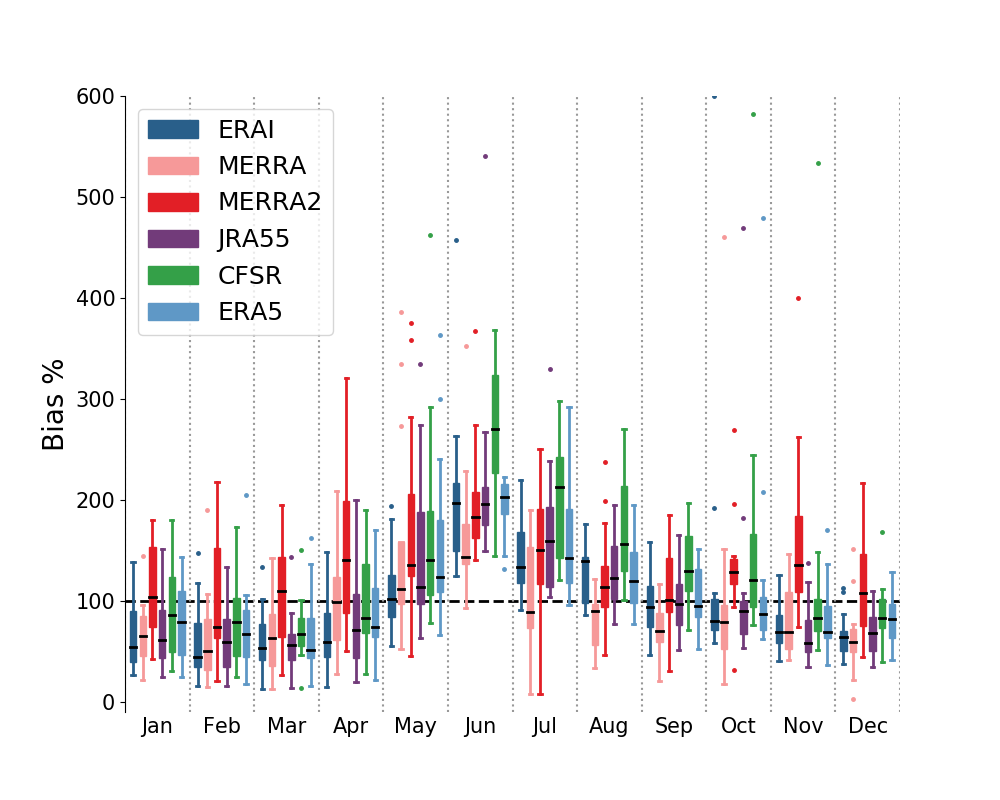

['ERAI_bias', 'MERRA_bias', 'MERRA2_bias', 'JRA55_bias', 'CFSR_bias', 'ERA5_bias']
['ERAI_bias', 'MERRA_bias', 'MERRA2_bias', 'JRA55_bias', 'CFSR_bias', 'ERA5_bias']
['ERAI_bias', 'MERRA_bias', 'MERRA2_bias', 'JRA55_bias', 'CFSR_bias', 'ERA5_bias']
['ERAI_bias', 'MERRA_bias', 'MERRA2_bias', 'JRA55_bias', 'CFSR_bias', 'ERA5_bias']
['ERAI_bias', 'MERRA_bias', 'MERRA2_bias', 'JRA55_bias', 'CFSR_bias', 'ERA5_bias']
['ERAI_bias', 'MERRA_bias', 'MERRA2_bias', 'JRA55_bias', 'CFSR_bias', 'ERA5_bias']
['ERAI_bias', 'MERRA_bias', 'MERRA2_bias', 'JRA55_bias', 'CFSR_bias', 'ERA5_bias']
['ERAI_bias', 'MERRA_bias', 'MERRA2_bias', 'JRA55_bias', 'CFSR_bias', 'ERA5_bias']
['ERAI_bias', 'MERRA_bias', 'MERRA2_bias', 'JRA55_bias', 'CFSR_bias', 'ERA5_bias']
['ERAI_bias', 'MERRA_bias', 'MERRA2_bias', 'JRA55_bias', 'CFSR_bias', 'ERA5_bias']
['ERAI_bias', 'MERRA_bias', 'MERRA2_bias', 'JRA55_bias', 'CFSR_bias', 'ERA5_bias']
['ERAI_bias', 'MERRA_bias', 'MERRA2_bias', 'JRA55_bias', 'CFSR_bias', 'ERA5_bias']


In [16]:
fig, ax = plt.subplots(figsize=(10,8))

column = ['ERAI_bias', 'MERRA_bias', 'MERRA2_bias', 'JRA55_bias', 'CFSR_bias', 'ERA5_bias']
labels = [c.replace('_bias','') for c in column]

#flierprops = dict(marker='.', markerfacecolor=)

for month in range(1,13):
    pos = [month+p for p in [-0.375, -0.225, -0.075, 0.075, 0.225 ,0.375]]
    x = columns2list(df[df['Date'].dt.month == month])
    bp = ax.boxplot(x, positions=pos, widths=0.1, labels=None, patch_artist=True)
    setBoxColors(bp)

for x in np.arange(0,13):
    ax.axvline(x+0.5, color='0.6', linestyle=':')
    
ax.set_ylim(-10.,600.)
ax.set_xlim(0.5,12.5)

# Hide all but left y-axis
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.set_xticks([])

# Format left y-axis
ax.set_ylabel('Bias %', fontsize=20)
ax.axhline(100., linestyle='--', linewidth=2, color='k', zorder=1)

ax.set_xticks(range(1,13))
ax.set_xticklabels(calendar.month_abbr[1:])

ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='x', length=0)

# Create legend
handles = [mpatches.Patch(color=reanalysis_color[r], label=r) for r in labels]
ax.legend(handles=handles, fontsize=18, frameon=True, loc='upper left',)

#fig.savefig(os.path.join(r'C:\Users\apbarret\Documents\Presentations\AGU2018','yang_trajectory_reanalysis_bias.png'))
fig.savefig(os.path.join('/home/apbarret/src/SnowOnSeaIce/source',
                         'yang_trajectory_reanalysis_bias.png'))

In [32]:
def sampleMean(x):
    return x.sample(10, axis=0).mean(axis=0)*0.01

columns = ['ERAI_bias','MERRA_bias','MERRA2_bias','JRA55_bias','CFSR_bias','ERA5_bias']
df[columns].groupby(df.Date.dt.month).apply(sampleMean)

,ERAI_bias,MERRA_bias,MERRA2_bias,JRA55_bias,CFSR_bias,ERA5_bias
Date,,,,,,
1,0.661661,0.684695,1.250962,0.730071,0.914838,0.810173
2,0.631884,0.778913,1.234764,0.718447,0.942058,0.842394
3,0.663889,0.684428,1.186719,0.633248,0.794283,0.746506
4,0.711183,1.111308,1.602147,0.843689,1.031868,0.914827
5,1.134251,1.729758,1.803052,1.545161,1.846028,1.684381
6,2.092380,1.666458,2.071308,2.099509,2.893487,2.128500
7,1.519437,1.052395,1.564883,1.704888,2.078178,1.581744
8,1.361901,0.801562,1.415820,1.400598,1.905149,1.374771
9,0.942809,0.797141,1.184485,0.935703,1.348067,1.016140


In [33]:
from sklearn.model_selection import train_test_split

ImportError: No module named model_selection

In [ ]:
def doCorrect(x, correction):
    columns = ['ERAI_prectot','MERRA_prectot','MERRA2_prectot','JRA55_prectot','CFSR_prectot','ERA5_prectot']
    month = x.Date.dt.month.values[0]
    for c in columns:
        x[c.replace('_prectot','_corr')] = x[c]/correction[c.replace('_prectot','_bias')].loc[month]
        x[c.replace('_prectot','_corrbias')] = x[c.replace('_prectot','_corr')]*100./x['Pc']
    return x

In [ ]:
result_list = []
for i in range(50):
    train, test = train_test_split(df, test_size=0.33)
    correction = train[columns].groupby(train.Date.dt.month).mean()*0.01
    result_list.append(test.groupby(test.Date.dt.month).apply(doCorrect, correction))
    
result = pd.concat(result_list,axis=0)

In [31]:
fig2, ax2 = plt.subplots(figsize=(10,8))

column = ['ERAI_corrbias', 'MERRA_corrbias', 'MERRA2_corrbias', 'JRA55_corrbias', 'CFSR_corrbias', 'ERA5_corrbias']
labels = [c.replace('_corrbias','') for c in column]

for month in range(1,13):
    pos = [month+p for p in [-0.375, -0.225, -0.075, 0.075, 0.225 ,0.375]]
    #x = [df[df['Date'].dt.month == month][c].values for c in column]
    x = columns2list(result[result['Date'].dt.month == month], column=column)
    bp = ax2.boxplot(x, positions=pos, widths=0.1, labels=None, patch_artist=True)
    setBoxColors(bp)
    #ax2.plot(month, junk[month-1], 'ko')

ax2.set_ylim(-10.,700.)
ax2.set_xlim(0,13)

# Hide all but left y-axis
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['right'].set_visible(False)
#ax.set_xticks([])

# Format left y-axis
ax2.set_ylabel('Bias %', fontsize=20)
ax2.axhline(100., linestyle='--', color='k')

ax2.set_xticks(range(1,13))
ax2.set_xticklabels(calendar.month_abbr[1:])

ax2.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='x', length=0)

# Create legend
handles = [mpatches.Patch(color=reanalysis_color[r], label=r) for r in labels]
ax2.legend(handles=handles, fontsize=18, frameon=False)

#fig2.savefig(os.path.join(r'C:\Users\apbarret\Documents\Presentations\AGU2018',
#                          'yang_trajectory_reanalysis_corrected_bias_ensemble.png'))

<IPython.core.display.Javascript object>

NameError: name 'result' is not defined

In [ ]:
result['ERAI_bias'].groupby(result['Date'].dt.month).median()*1e-2

In [ ]:
df.columns